In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2024-05-11 16:18:10--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 16.12.40.71, 52.219.158.155, 52.219.156.195, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|16.12.40.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  44.1MB/s    in 3.6s    

2024-05-11 16:18:14 (42.0 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [1]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install opencv-python
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install pydot

In [2]:
# Tensorflow Libraries
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import load_model, Model
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras import layers

# CNN keras Libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
%matplotlib inline

import imageio.v2 as imageio

import os, shutil
from os import listdir, path

In [3]:
# Visualizing Model Architecture
from IPython.display import SVG
from keras.applications.resnet import ResNet50
from keras.utils import plot_model
from keras.utils import load_img, img_to_array, array_to_img
import pydot
import cv2

# Loading Saved CNN Model
from keras.models import load_model
from keras.preprocessing import image
import keras.utils as image

# Evaluation Metrics Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [4]:
# Create a Training Set
directory = r'/content/Lung_cancer_dataset/Train'
categories = ['Bengin_cases', 'Malignant_cases', 'Normal_cases']

In [5]:
origin_path = "/content/Lung_cancer_dataset"

In [6]:
def view_files_and_labels_train(folder="/content/Lung_cancer_dataset/Train"):
 # Initialize
 imageNames = list()
 labels = list()

 # Paths
 normal_path = "/content/Lung_cancer_dataset/Train/Normal cases"
 bengin_cases_path = "/content/Lung_cancer_dataset/Train/Benign cases"
 malignant_cases_path = "/content/Lung_cancer_dataset/Train/Malignant cases"

 # Get data and label
 for file in listdir(normal_path):
  imageNames.append(file)
  labels.append('normal')

 for file in listdir(bengin_cases_path):
  imageNames.append(file)
  labels.append('bengin_cases_cancer')

 for file in listdir(malignant_cases_path):
  imageNames.append(file)
  labels.append('malignant_cases_cancer')

 # Creating a dictionary of dataset
 dico = {'filename':imageNames, 'label':labels}

 # Converting dico to df
 df = pd.DataFrame(data=dico)

 return df


In [7]:
def view_files_and_labels_test(folder="/content/Lung_cancer_dataset/Test"):
 # Initialize
 imageNames = list()
 labels = list()

 # Paths
 normal_path = "/content/Lung_cancer_dataset/Train/Normal cases"
 bengin_cases_path = "/content/Lung_cancer_dataset/Train/Benign cases"
 malignant_cases_path = "/content/Lung_cancer_dataset/Train/Malignant cases"

 # Get data and label
 for file in listdir(normal_path):
  imageNames.append(file)
  labels.append('normal')

 for file in listdir(bengin_cases_path):
  imageNames.append(file)
  labels.append('bengin_cases_cancer')

 for file in listdir(malignant_cases_path):
  imageNames.append(file)
  labels.append('malignant_cases_cancer')

 # Creating a dictionary of dataset
 dico = {'filename':imageNames, 'label':labels}

 # Converting dico to df
 df = pd.DataFrame(data=dico)

 return df

In [8]:
def view_files_and_labels_train(folder="/content/Lung_cancer_dataset/Valid"):
 # Initialize
 imageNames = list()
 labels = list()

 # Paths
 normal_path = "/content/Lung_cancer_dataset/Train/Normal cases"
 bengin_cases_path = "/content/Lung_cancer_dataset/Train/Benign cases"
 malignant_cases_path = "/content/Lung_cancer_dataset/Train/Malignant cases"

 # Get data and label
 for file in listdir(normal_path):
  imageNames.append(file)
  labels.append('normal')

 for file in listdir(bengin_cases_path):
  imageNames.append(file)
  labels.append('bengin_cases_cancer')

 for file in listdir(malignant_cases_path):
  imageNames.append(file)
  labels.append('malignant_cases_cancer')

 # Creating a dictionary of dataset
 dico = {'filename':imageNames, 'label':labels}

 # Converting dico to df
 df = pd.DataFrame(data=dico)

 return df


In [12]:
# Training, validation and test Sets summary
df_train = view_files_and_labels_train(folder="/content/Lung_cancer_dataset/Train")
df_test = view_files_and_labels_test(folder="/content/Lung_cancer_dataset/Test")
df_valid = view_files_and_labels_train(folder="/content/Lung_cancer_dataset/Valid")

In [13]:
print("Training Set")
print("------------")
print(f"{df_train.label.value_counts()} \n")

print("Testing Set")
print("------------")
print(f"{df_test.label.value_counts()}")

print("Validation Set")
print("------------")
print(f"{df_valid.label.value_counts()}")

Training Set
------------
label
normal                    441
malignant_cases_cancer    396
bengin_cases_cancer       112
Name: count, dtype: int64 

Testing Set
------------
label
normal                    441
malignant_cases_cancer    396
bengin_cases_cancer       112
Name: count, dtype: int64
Validation Set
------------
label
normal                    441
malignant_cases_cancer    396
bengin_cases_cancer       112
Name: count, dtype: int64


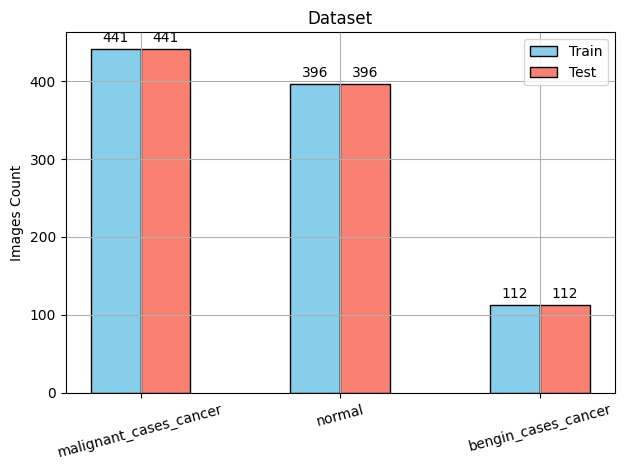

In [14]:
labels = ['malignant_cases_cancer', 'normal', 'bengin_cases_cancer']
train_list = df_train.label.value_counts()
test_list = df_test.label.value_counts()

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_list, width, label='Train', color='skyblue', edgecolor='black')
rects3 = ax.bar(x + width/2, test_list, width, label='Test', color='salmon', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects3, padding=3)

ax.grid(True)

fig.tight_layout()

plt.show()

In [15]:
img_width = 64
img_height = 64

In [16]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)
train_data_generator = datagen.flow_from_directory(directory="/content/Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")
validation_data_generator = datagen.flow_from_directory(directory="/content/Lung_cancer_dataset/Valid", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")


Found 855 images belonging to 4 classes.
Found 48 images belonging to 4 classes.


In [17]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.4))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
54/54 [==============================] - 8s 59ms/step - loss: 0.9988 - accuracy: 0.5485 - val_loss: 1.0766 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 3s 54ms/step - loss: 0.7885 - accuracy: 0.6632 - val_loss: 0.8852 - val_accuracy: 0.5625
Epoch 3/50
54/54 [==============================] - 3s 54ms/step - loss: 0.6058 - accuracy: 0.7719 - val_loss: 0.6826 - val_accuracy: 0.6250
Epoch 4/50
54/54 [==============================] - 3s 53ms/step - loss: 0.4571 - accuracy: 0.8222 - val_loss: 0.4355 - val_accuracy: 0.7500
Epoch 5/50
54/54 [==============================] - 3s 55ms/step - loss: 0.3611 - accuracy: 0.8620 - val_loss: 0.3841 - val_accuracy: 0.7917
Epoch 6/50
54/54 [==============================] - 3s 53ms/step - loss: 0.2774 - accuracy: 0.8889 - val_loss: 0.2696 - val_accuracy: 0.9583
Epoch 7/50
54/54 [==============================] - 3s 54ms/step - loss: 0.1597 - accuracy: 0.9427 - val_loss: 0.2311 - val_accuracy: 0.8333
Epoch 8/50
54

In [19]:
# Get the history of the model training
history_dict = history.history

# Get the accuracy values for training and validation sets
train_acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Calculate and print the final accuracy for training and validation sets
print(f"Final training accuracy: {train_acc_values[-1]*100:.2f}%")
print(f"Final validation accuracy: {val_acc_values[-1]*100:.2f}%")

Final training accuracy: 99.77%
Final validation accuracy: 97.92%


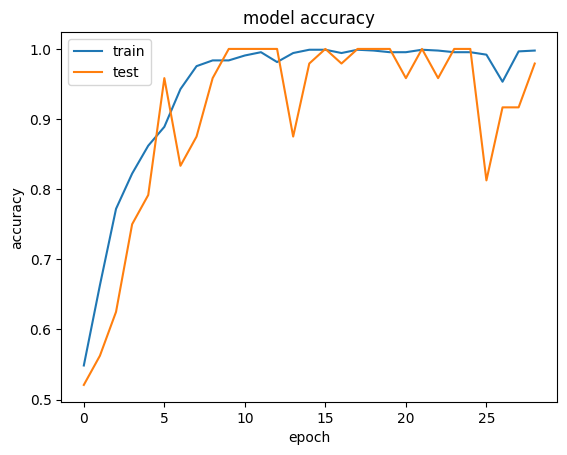

In [20]:
# Check model accuracy trends (Visualization)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

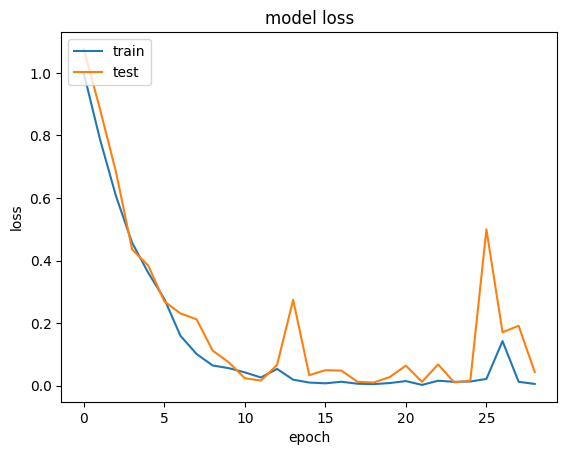

In [21]:
# Check loss trends

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = test_datagen.flow_from_directory(
    directory="/content/Lung_cancer_dataset/Test",
    target_size=(img_width, img_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=16,
    shuffle=False
)

# Predict the test data
predictions = model.predict(test_data_generator, steps=len(test_data_generator), verbose=1)

# The predictions are in the form of probabilities for each class. To convert these probabilities into actual class predictions, you can use `np.argmax()` function
predicted_classes = np.argmax(predictions, axis=1)

# If you have the true labels for the test data, you can calculate the accuracy as follows:
true_classes = test_data_generator.classes
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes) * 100

print(f"Test accuracy: {accuracy:.2f}%")

Found 76 images belonging to 4 classes.
5/5 [==============================] - 0s 60ms/step
Test accuracy: 100.00%


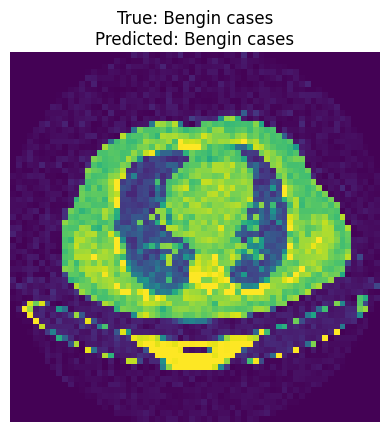

In [25]:
# Get a single image and its corresponding label
image, _ = next(test_data_generator)  # Assuming labels are at index 1

# Select the first image from the batch (index 0)
image = image[0]

# Plot the image
plt.imshow(image)  # Assuming image has the correct shape for imshow
plt.title(f"True: {class_labels[true_classes[0]]}\nPredicted: {class_labels[predicted_classes[0]]}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 19ms/step
ACTUAL: {0: 'Malignant', 1: 'Malignant', 2: 'Malignant', 3: 'Malignant', 4: 'Malignant'}
PREDICTIONS: {0: 'Malignant', 1: 'Malignant', 2: 'Malignant', 3: 'Malignant', 4: 'Malignant'}


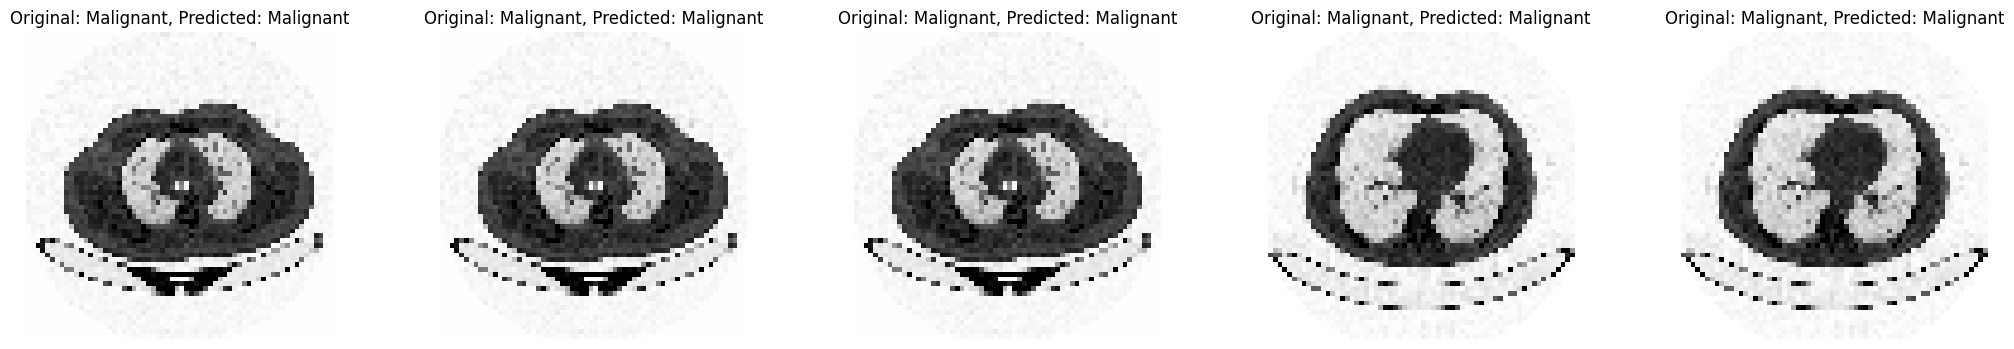

In [26]:
# Visualizing the predictions of the model on unseen data

x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(5):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)


cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:5]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1

print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()

In [31]:
from keras.preprocessing import image
import numpy as np

# Load your trained model
# model = keras.models.load_model('path_to_your_model.h5')

# Use the upload button to upload your image
from google.colab import files
uploaded = files.upload()

# Get the filename
filename = next(iter(uploaded))

# Load and preprocess the image
img = image.load_img(filename, target_size=(img_width, img_height), color_mode="grayscale")
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0

# Make the prediction
predictions = model.predict(img)

# Convert probabilities into class predictions
predicted_class = np.argmax(predictions, axis=1)

# Get the class labels from the data generator
class_labels = list(train_data_generator.class_indices.keys())

# Print the predicted class
print(f"Predicted class: {class_labels[predicted_class[0]]}")

Saving 000116 (5).png to 000116 (5).png
1/1 [==============================] - 0s 22ms/step
Predicted class: Malignant cases
